<a href="https://colab.research.google.com/github/divsal009/div/blob/master/TITANIC_assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [283]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [284]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [285]:
titanic_df = pd.read_csv("/content/titanic_file.csv")

In [286]:
print(titanic_df.columns.values)

['Passenger Class' 'Name' 'Sex' 'Age' 'No of Siblings or Spouses on Board'
 'No of Parents or Children on Board' 'Ticket Number' 'Passenger Fare'
 'Cabin' 'Port of Embarkation' 'Life Boat' 'Survived']


In [287]:
titanic_df.head()


,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
0,First,"Allen, Miss. Elisabeth Walton",Female,29.0,0.0,0.0,24160,211.3,B5,Southampton,2,Yes
1,First,"Allison, Master. Hudson Trevor",Male,0.9,1.0,2.0,113781,151.6,C22 C26,Southampton,11,Yes
2,First,"Allison, Miss. Helen Loraine",Female,2.0,1.0,2.0,113781,151.6,C22 C26,Southampton,NaN,No
3,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0,1.0,2.0,113781,151.6,C22 C26,Southampton,NaN,No
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0,1.0,2.0,113781,151.6,C22 C26,Southampton,NaN,No


In [288]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Passenger Class                     1309 non-null   object 
 1   Name                                1309 non-null   object 
 2   Sex                                 1309 non-null   object 
 3   Age                                 1046 non-null   float64
 4   No of Siblings or Spouses on Board  1309 non-null   float64
 5   No of Parents or Children on Board  1309 non-null   float64
 6   Ticket Number                       1309 non-null   object 
 7   Passenger Fare                      1308 non-null   float64
 8   Cabin                               295 non-null    object 
 9   Port of Embarkation                 1307 non-null   object 
 10  Life Boat                           486 non-null    object 
 11  Survived                            1309 no

In [289]:
dummy=pd.get_dummies(titanic_df['Survived'])


In [290]:
 
dummy.head()


,No,Yes
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [291]:
df2=pd.concat((titanic_df,dummy),axis=1)

In [292]:
df2.head()

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived,No,Yes
0,First,"Allen, Miss. Elisabeth Walton",Female,29.0,0.0,0.0,24160,211.3,B5,Southampton,2,Yes,0,1
1,First,"Allison, Master. Hudson Trevor",Male,0.9,1.0,2.0,113781,151.6,C22 C26,Southampton,11,Yes,0,1
2,First,"Allison, Miss. Helen Loraine",Female,2.0,1.0,2.0,113781,151.6,C22 C26,Southampton,NaN,No,1,0
3,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0,1.0,2.0,113781,151.6,C22 C26,Southampton,NaN,No,1,0
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0,1.0,2.0,113781,151.6,C22 C26,Southampton,NaN,No,1,0


In [293]:
df3=df2.drop(["Survived"],axis=1)

In [294]:
df3.head()

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,No,Yes
0,First,"Allen, Miss. Elisabeth Walton",Female,29.0,0.0,0.0,24160,211.3,B5,Southampton,2,0,1
1,First,"Allison, Master. Hudson Trevor",Male,0.9,1.0,2.0,113781,151.6,C22 C26,Southampton,11,0,1
2,First,"Allison, Miss. Helen Loraine",Female,2.0,1.0,2.0,113781,151.6,C22 C26,Southampton,NaN,1,0
3,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0,1.0,2.0,113781,151.6,C22 C26,Southampton,NaN,1,0
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0,1.0,2.0,113781,151.6,C22 C26,Southampton,NaN,1,0


In [295]:
df4=df3.drop(["No"],axis=1)

In [296]:
df4.head()

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Yes
0,First,"Allen, Miss. Elisabeth Walton",Female,29.0,0.0,0.0,24160,211.3,B5,Southampton,2,1
1,First,"Allison, Master. Hudson Trevor",Male,0.9,1.0,2.0,113781,151.6,C22 C26,Southampton,11,1
2,First,"Allison, Miss. Helen Loraine",Female,2.0,1.0,2.0,113781,151.6,C22 C26,Southampton,NaN,0
3,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0,1.0,2.0,113781,151.6,C22 C26,Southampton,NaN,0
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0,1.0,2.0,113781,151.6,C22 C26,Southampton,NaN,0


In [297]:
df5=df4.rename(columns={"Yes":"Survived"})

In [298]:
df5.head()

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
0,First,"Allen, Miss. Elisabeth Walton",Female,29.0,0.0,0.0,24160,211.3,B5,Southampton,2,1
1,First,"Allison, Master. Hudson Trevor",Male,0.9,1.0,2.0,113781,151.6,C22 C26,Southampton,11,1
2,First,"Allison, Miss. Helen Loraine",Female,2.0,1.0,2.0,113781,151.6,C22 C26,Southampton,NaN,0
3,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0,1.0,2.0,113781,151.6,C22 C26,Southampton,NaN,0
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0,1.0,2.0,113781,151.6,C22 C26,Southampton,NaN,0


In [299]:
df6 = df5.drop(['Name', 'Cabin'], axis=1)


In [300]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Passenger Class                     1309 non-null   object 
 1   Sex                                 1309 non-null   object 
 2   Age                                 1046 non-null   float64
 3   No of Siblings or Spouses on Board  1309 non-null   float64
 4   No of Parents or Children on Board  1309 non-null   float64
 5   Ticket Number                       1309 non-null   object 
 6   Passenger Fare                      1308 non-null   float64
 7   Port of Embarkation                 1307 non-null   object 
 8   Life Boat                           486 non-null    object 
 9   Survived                            1309 non-null   uint8  
dtypes: float64(4), object(5), uint8(1)
memory usage: 93.4+ KB


In [301]:
df7 = df6.drop(['Ticket Number'], axis=1)


In [302]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Passenger Class                     1309 non-null   object 
 1   Sex                                 1309 non-null   object 
 2   Age                                 1046 non-null   float64
 3   No of Siblings or Spouses on Board  1309 non-null   float64
 4   No of Parents or Children on Board  1309 non-null   float64
 5   Passenger Fare                      1308 non-null   float64
 6   Port of Embarkation                 1307 non-null   object 
 7   Life Boat                           486 non-null    object 
 8   Survived                            1309 non-null   uint8  
dtypes: float64(4), object(4), uint8(1)
memory usage: 83.2+ KB


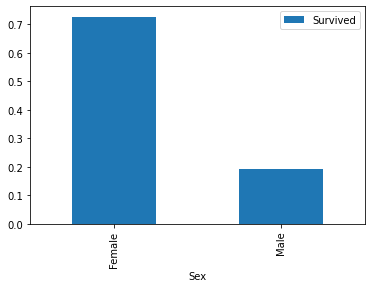

In [303]:
import matplotlib.pyplot as plt

sex_pivot = df7.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()

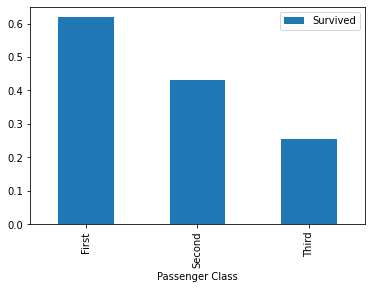

In [304]:
class_pivot = df7.pivot_table(index="Passenger Class",values="Survived")
class_pivot.plot.bar()
plt.show()

In [305]:
df7["Age"].describe()

count    1046.000000
mean       29.881166
std        14.413435
min         0.200000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

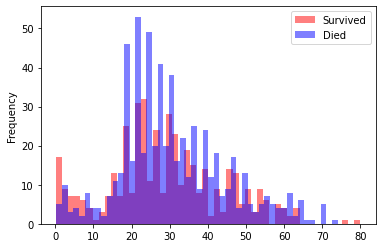

In [306]:
survived = df7[df7["Survived"] == 1]
died = df7[df7["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()


In [308]:
df_all_corr = df7.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_all_corr[df_all_corr['Feature 1'] == 'Age']

,Feature 1,Feature 2,Correlation Coefficient
0,Age,Age,1.000000
9,Age,No of Siblings or Spouses on Board,0.243684
13,Age,Passenger Fare,0.178752
18,Age,No of Parents or Children on Board,0.150922
22,Age,Survived,0.055512


Missing values in Age are filled with median age, but using median age of the whole data set is not a good choice. Median age of No of Siblings or Spouses on Board groups is the best choice because of its high correlation with Age (0.243684) and Survived (0.055512). It is also more logical to group ages by passenger classes instead of other features.

In [ ]:
def process_age(df7,cut_points,label_names):
    df7["Age"] = df7["Age"].fillna(-0.5)
    df7["Age_categories"] = pd.cut(df7["Age"],cut_points,labels=label_names)
    return df7



In [ ]:
cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
df7 = process_age(df7,cut_points,label_names)



In [ ]:
pivot = df7.pivot_table(index="Age_categories",values='Survived')
pivot.plot.bar()
plt.show()

In [ ]:
df7.head()